In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

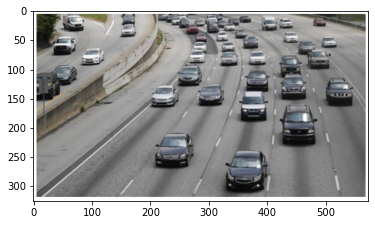

In [2]:
image = cv2.imread('cars in traffic.png')
plt.imshow(image[:,:,::-1])
plt.show()

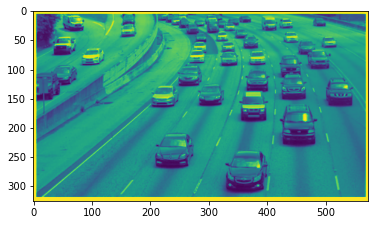

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

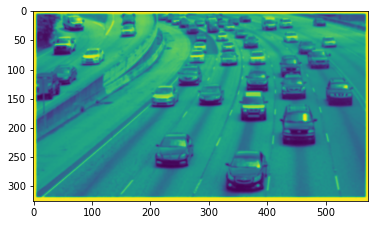

In [11]:
blurred = cv2.GaussianBlur(gray, (5, 5),0)
plt.imshow(blurred)
plt.show()

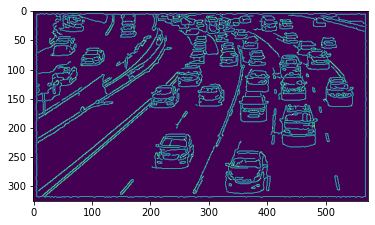

In [12]:
edges = cv2.Canny(blurred, 30, 150)
plt.imshow(edges)
plt.show()

In [13]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.RETR_EXTERNAL retrieves only the external contours and ignores any internal contours. 
#cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.

In [14]:
detected_coins = [] 

In [18]:
for contour in contours:
        
    # Calculate the moments for the current contour
     M = cv2.moments(contour)

    # Check if the contour is valid that is not too small 
     if M['m00'] > 50:  
        #Moments are statistical measures that provide information about the spatial distribution 
        #of pixel values within the contour.
        #M['m10'] represents the moment about the x-axis (horizontal) of the contour.
        #M['m01'] represents the moment about the y-axis (vertical) of the contour.
        #M['m00'] represents the zeroth order moment, which is simply the area of the contour.
    
        # center of contour
        coin_x = int(M['m10'] / M['m00'])
        coin_y = int(M['m01'] / M['m00'])

        # bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        
        # region around the coin
        #The function returns four values: x, y, w, and h.

        #x is the x-coordinate (horizontal position) of the top-left corner of the bounding rectangle.
        #y is the y-coordinate (vertical position) of the top-left corner of the bounding rectangle.
        #w is the width of the bounding rectangle.
        #h is the height of the bounding rectangle.

        # Append the coin information to the list
        detected_coins.append({
            'centroid': (coin_x, coin_y),
            'bounding_rect': (x, y, w, h)
        })
        

In [19]:
print(M)

{'m00': 161.5, 'm10': 17174.166666666664, 'm01': 37993.33333333333, 'm20': 2320627.583333333, 'm11': 3673633.375, 'm02': 9329105.083333332, 'm30': 350889945.05, 'm21': 464974131.56666666, 'm12': 813188453.7666667, 'm03': 2372373161.7000003, 'mu20': 494299.40565875475, 'mu11': -366638.07322841324, 'mu02': 391065.5924492609, 'mu30': -1018449.0024210811, 'mu21': -2982342.5148842484, 'mu12': -6378112.761491194, 'mu03': -6323865.860508919, 'nu20': 18.951563061421265, 'nu11': -14.056995590043547, 'nu02': 14.993552797372194, 'nu30': -3.0726137553346016, 'nu21': -8.997590073306208, 'nu12': -19.242472580802197, 'nu03': -19.078812177830443}


In [ ]:
for idx, coin_info in enumerate(detected_coins):
    coin_x, coin_y = coin_info['centroid']
    x, y, w, h = coin_info['bounding_rect']
    
    #cropped images of coins present in the original image
    coin_image = image[y:y+h, x:x+w]

    cv2.imshow(f'Coin {idx + 1}', coin_image)
    print(f'Pixel Location of Coin {idx + 1} : ({coin_x}, {coin_y})')
    
print()    
print(f'There are {len(detected_coins)} coins present in the given input image')  


    
cv2.waitKey(0)
cv2.destroyAllWindows()

Pixel Location of Coin 1 : (101, 82)
Pixel Location of Coin 2 : (360, 290)
Pixel Location of Coin 3 : (160, 300)
Pixel Location of Coin 4 : (519, 293)
Pixel Location of Coin 5 : (401, 292)
Pixel Location of Coin 6 : (282, 294)
Pixel Location of Coin 7 : (241, 224)
Pixel Location of Coin 8 : (316, 223)
Pixel Location of Coin 9 : (376, 179)
Pixel Location of Coin 10 : (463, 181)
Pixel Location of Coin 11 : (467, 198)
Pixel Location of Coin 12 : (90, 175)
Pixel Location of Coin 13 : (106, 228)
Pixel Location of Coin 14 : (376, 162)
Pixel Location of Coin 15 : (526, 144)
Pixel Location of Coin 16 : (457, 132)
Pixel Location of Coin 17 : (267, 122)
Pixel Location of Coin 18 : (383, 110)
Pixel Location of Coin 19 : (51, 127)
Pixel Location of Coin 20 : (518, 119)
Pixel Location of Coin 21 : (251, 108)
Pixel Location of Coin 22 : (280, 87)
Pixel Location of Coin 23 : (436, 101)
Pixel Location of Coin 24 : (495, 79)
Pixel Location of Coin 25 : (101, 82)
Pixel Location of Coin 26 : (173, 96)
Pi